In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("Jan_2019_ontime.csv")
print(df.shape)
df.columns

(583985, 22)


Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [2]:
df.columns = [i.lower() for i in df.columns]

In [3]:
df.head()

,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,...,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [4]:
df.columns

Index(['day_of_month', 'day_of_week', 'op_unique_carrier',
       'op_carrier_airline_id', 'op_carrier', 'tail_num', 'op_carrier_fl_num',
       'origin_airport_id', 'origin_airport_seq_id', 'origin',
       'dest_airport_id', 'dest_airport_seq_id', 'dest', 'dep_time',
       'dep_del15', 'dep_time_blk', 'arr_time', 'arr_del15', 'cancelled',
       'diverted', 'distance', 'unnamed: 21'],
      dtype='object')

In [5]:
df.dtypes.value_counts()

int64      8
float64    8
object     6
dtype: int64

In [6]:
df.select_dtypes(include=['object']).columns

Index(['op_unique_carrier', 'op_carrier', 'tail_num', 'origin', 'dest',
       'dep_time_blk'],
      dtype='object')

In [7]:
df.select_dtypes(include=['float64']).columns

Index(['dep_time', 'dep_del15', 'arr_time', 'arr_del15', 'cancelled',
       'diverted', 'distance', 'unnamed: 21'],
      dtype='object')

In [8]:
df.select_dtypes(include=['int64']).columns

Index(['day_of_month', 'day_of_week', 'op_carrier_airline_id',
       'op_carrier_fl_num', 'origin_airport_id', 'origin_airport_seq_id',
       'dest_airport_id', 'dest_airport_seq_id'],
      dtype='object')

In [9]:
df.shape

(583985, 22)

In [10]:
df1=df[['day_of_month','day_of_week','op_carrier_airline_id','origin','dest','dep_time','dep_del15', 'arr_time', 'arr_del15','cancelled',
       'diverted', 'distance']]

In [11]:
df1.head()

,day_of_month,day_of_week,op_carrier_airline_id,origin,dest,dep_time,dep_del15,arr_time,arr_del15,cancelled,diverted,distance
0,1,2,20363,GNV,ATL,601.0,0.0,722.0,0.0,0.0,0.0,300.0
1,1,2,20363,MSP,CVG,1359.0,0.0,1633.0,0.0,0.0,0.0,596.0
2,1,2,20363,DTW,CVG,1215.0,0.0,1329.0,0.0,0.0,0.0,229.0
3,1,2,20363,TLH,ATL,1521.0,0.0,1625.0,0.0,0.0,0.0,223.0
4,1,2,20363,ATL,FSM,1847.0,0.0,1940.0,0.0,0.0,0.0,579.0


In [12]:
df1.isna().sum()

day_of_month                 0
day_of_week                  0
op_carrier_airline_id        0
origin                       0
dest                         0
dep_time                 16352
dep_del15                16355
arr_time                 17061
arr_del15                18022
cancelled                    0
diverted                     0
distance                     0
dtype: int64

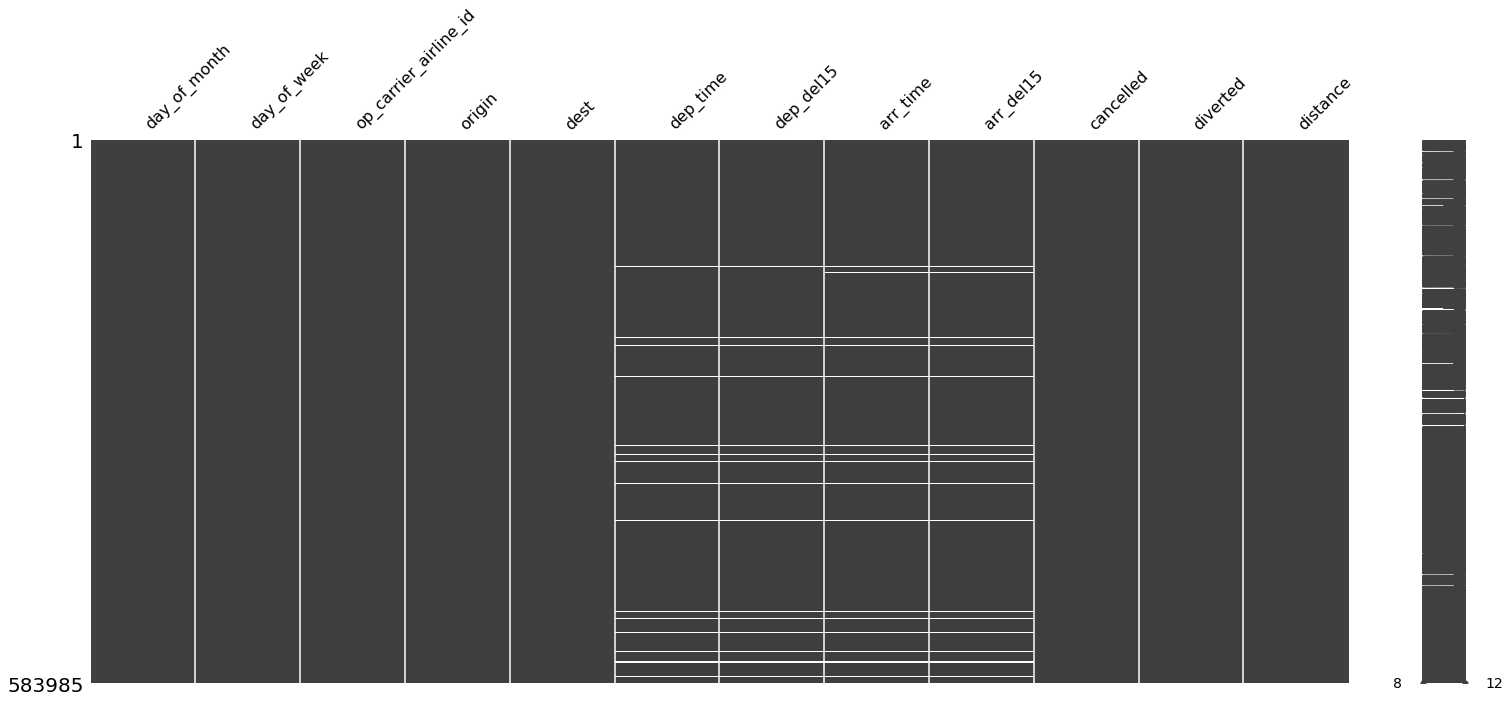

In [13]:
%matplotlib inline
import missingno as msno
msno.matrix(df1)

In [14]:
df1['cancelled'].value_counts()

0.0    567259
1.0     16726
Name: cancelled, dtype: int64

In [15]:
df1[df1['cancelled']==1].isna().sum()

day_of_month                 0
day_of_week                  0
op_carrier_airline_id        0
origin                       0
dest                         0
dep_time                 16352
dep_del15                16355
arr_time                 16726
arr_del15                16726
cancelled                    0
diverted                     0
distance                     0
dtype: int64

In [16]:
df1['diverted'].value_counts()

0.0    582689
1.0      1296
Name: diverted, dtype: int64

In [17]:
df1[df1['diverted']==1].isna().sum()

day_of_month                0
day_of_week                 0
op_carrier_airline_id       0
origin                      0
dest                        0
dep_time                    0
dep_del15                   0
arr_time                  335
arr_del15                1296
cancelled                   0
diverted                    0
distance                    0
dtype: int64

In [18]:
df1.dropna(axis=0, how='any', inplace=True)
df1.isna().sum().sum()

<ipython-input-18-b57aeff96ccd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(axis=0, how='any', inplace=True)


0

In [19]:
df1['cancelled'].value_counts()

0.0    565963
Name: cancelled, dtype: int64

In [20]:
df1['diverted'].value_counts()

0.0    565963
Name: diverted, dtype: int64

In [21]:
df1.drop(['cancelled','diverted'], axis=1, inplace=True)

C:\Users\dcont\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
df1['arr_del15'].value_counts()

0.0    460741
1.0    105222
Name: arr_del15, dtype: int64

In [23]:
df1['dep_del15'].value_counts()

0.0    467658
1.0     98305
Name: dep_del15, dtype: int64

In [24]:
df1[['arr_del15','dep_del15','dest']].groupby(['dep_del15',
'arr_del15']).count()

dest
dep_del15 arr_del15        
0.0       0.0        440724
          1.0         26934
1.0       0.0         20017
          1.0         78288

In [25]:
print("There are {} unique origin city".format(df1['origin'].nunique()))
print("There are {} unique destination city".format(df1['dest'].nunique()))

There are 346 unique origin city
There are 346 unique destination city


In [26]:
df1[['origin','dep_del15']].groupby('origin').agg(['mean','count']).sort_values(by=('dep_del15','mean'), ascending=False)[:10]

dep_del15      
            mean count
origin                
HGR     0.700000    10
OGS     0.600000    10
OGD     0.500000     8
LCK     0.463415    41
ASE     0.387333   821
SCK     0.384615    52
ART     0.382979    47
VEL     0.369565    46
MMH     0.364865    74
IAG     0.355556    45

In [27]:
df1.columns

Index(['day_of_month', 'day_of_week', 'op_carrier_airline_id', 'origin',
       'dest', 'dep_time', 'dep_del15', 'arr_time', 'arr_del15', 'distance'],
      dtype='object')

In [28]:
df1[['dest','arr_del15']].groupby('dest').agg(['mean','count']).sort_values(by=('arr_del15','mean'), ascending=False)[:10]

arr_del15      
          mean count
dest                
OGS   0.500000    10
OGD   0.500000     8
MMH   0.440000    75
MKG   0.425532    47
HGR   0.400000    10
EAU   0.384615    52
PIB   0.383333    60
ALO   0.382979    47
PAH   0.377778    90
ASE   0.375306   818

In [29]:
df1.origin.value_counts().mean()

1635.7312138728323

In [30]:
origin_delays = df1[['origin', 'dep_del15']]. groupby ('origin'). agg(['mean', 'count'])

In [31]:
origin_delays [origin_delays [('dep_del15', 'count')]> 500] .sort_values (by = ('dep_del15', 'mean'), ascending = False) [: 10]

dep_del15       
            mean  count
origin                 
ASE     0.387333    821
MDW     0.303559   5620
LGA     0.282772  13350
ORD     0.281111  23336
BTV     0.275229    654
SBN     0.264078    515
EWR     0.247169  10244
GRR     0.242621   1389
PBI     0.237578   2395
SFO     0.226870  13078

In [32]:
df1['del15'] = df1['arr_del15']+df1['dep_del15']

<ipython-input-32-509f8eef53ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['del15'] = df1['arr_del15']+df1['dep_del15']


In [33]:
df1['del15'].value_counts

<bound method IndexOpsMixin.value_counts of 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
583980    0.0
583981    0.0
583982    0.0
583983    0.0
583984    0.0
Name: del15, Length: 565963, dtype: float64>

In [35]:
#https://towardsdatascience.com/a-practical-guide-for-exploratory-data-analysis-flight-delays-f8a713ef7121